In [1090]:
import pandas as pd
import numpy as np
from sklearn import  linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

In [1091]:
pd_carData = pd.read_csv("Car details v3.csv")

In [1092]:
pd_carData.T

,0,1,2,3,4,5,6,7,8,9,...,8118,8119,8120,8121,8122,8123,8124,8125,8126,8127
name,Maruti Swift Dzire VDI,Skoda Rapid 1.5 TDI Ambition,Honda City 2017-2020 EXi,Hyundai i20 Sportz Diesel,Maruti Swift VXI BSIII,Hyundai Xcent 1.2 VTVT E Plus,Maruti Wagon R LXI DUO BSIII,Maruti 800 DX BSII,Toyota Etios VXD,Ford Figo Diesel Celebration Edition,...,Hyundai i20 Magna,Maruti Wagon R LXI Optional,Hyundai Santro Xing GLS,Maruti Wagon R VXI BS IV with ABS,Hyundai i20 Magna 1.4 CRDi,Hyundai i20 Magna,Hyundai Verna CRDi SX,Maruti Swift Dzire ZDi,Tata Indigo CR4,Tata Indigo CR4
year,2014,2014,2006,2010,2007,2017,2007,2001,2011,2013,...,2013,2017,2008,2013,2014,2013,2007,2009,2013,2013
selling_price,450000,370000,158000,225000,130000,440000,96000,45000,350000,200000,...,380000,360000,120000,260000,475000,320000,135000,382000,290000,290000
km_driven,145500,120000,140000,127000,120000,45000,175000,5000,90000,169000,...,25000,80000,191000,50000,80000,110000,119000,120000,25000,25000
fuel,Diesel,Diesel,Petrol,Diesel,Petrol,Petrol,LPG,Petrol,Diesel,Diesel,...,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Diesel,Diesel,Diesel,Diesel
seller_type,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,...,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual,Individual
transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,...,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual
owner,First Owner,Second Owner,Third Owner,First Owner,First Owner,First Owner,First Owner,Second Owner,First Owner,First Owner,...,First Owner,First Owner,First Owner,Second Owner,Second Owner,First Owner,Fourth & Above Owner,First Owner,First Owner,First Owner
mileage,23.4 kmpl,21.14 kmpl,17.7 kmpl,23.0 kmpl,16.1 kmpl,20.14 kmpl,17.3 km/kg,16.1 kmpl,23.59 kmpl,20.0 kmpl,...,18.5 kmpl,20.51 kmpl,17.92 kmpl,18.9 kmpl,22.54 kmpl,18.5 kmpl,16.8 kmpl,19.3 kmpl,23.57 kmpl,23.57 kmpl
engine,1248 CC,1498 CC,1497 CC,1396 CC,1298 CC,1197 CC,1061 CC,796 CC,1364 CC,1399 CC,...,1197 CC,998 CC,1086 CC,998 CC,1396 CC,1197 CC,1493 CC,1248 CC,1396 CC,1396 CC


In [1093]:
pd_carData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,8128,2058,Maruti Swift Dzire VDI,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,8128.0,NaN,NaN,NaN,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,NaN,NaN,NaN,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,NaN,NaN,NaN,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
fuel,8128,4,Diesel,4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,8128,3,Individual,6766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,8128,2,Manual,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,8128,5,First Owner,5289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7907,393,18.9 kmpl,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,7907,121,1248 CC,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1094]:
pd_carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1095]:
pd_carData.dropna(inplace=True, axis=0, how='any')
pd_carData.duplicated().sum()
pd_carData.drop_duplicates(inplace=True)

In [1096]:
pd_carData['mileage']=pd_carData['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
pd_carData['mileage']=pd_carData['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
pd_carData['engine']=pd_carData['engine'].replace(' CC','',regex=True).str.replace(',', '')
pd_carData['max_power']=pd_carData['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

In [1097]:
pd_carData['mileage'] = pd.to_numeric(pd_carData['mileage'])
pd_carData['engine'] = pd.to_numeric(pd_carData['engine'])
pd_carData['max_power'] = pd.to_numeric(pd_carData['max_power'])
pd_carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 734.7+ KB


<h2>Analisis univariado</h2>

<p>name se elimina por ser string</p>

Analisis variable objetivo Selling_Price

boxplot es un tipo de grafico que facilmente nos permite identificar los outlayers, y la idea es eliminarlos

Engine

Text(0.5, 0, 'selling_price')

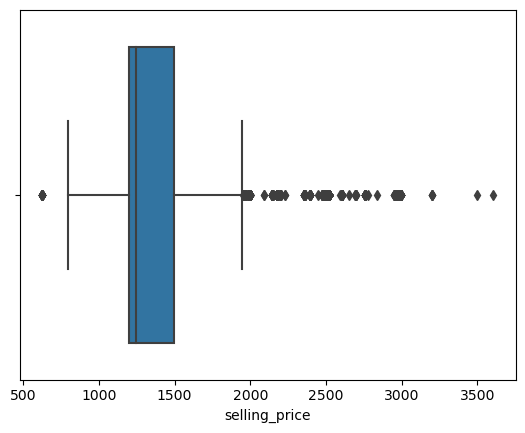

In [1098]:
sns.boxplot(pd_carData['engine'])
plt.xlabel('selling_price')

Truncado de engine

In [1099]:
Q1 = pd_carData['engine'].quantile(0.25)
Q3 = pd_carData['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

pd_carData[pd_carData['engine']> upper_limit]
pd_carData[pd_carData['engine']< lower_limit]

pd_carData = pd_carData[pd_carData['engine'] < upper_limit]
pd_carData.shape

(5535, 13)

Text(0.5, 0, 'selling_price')

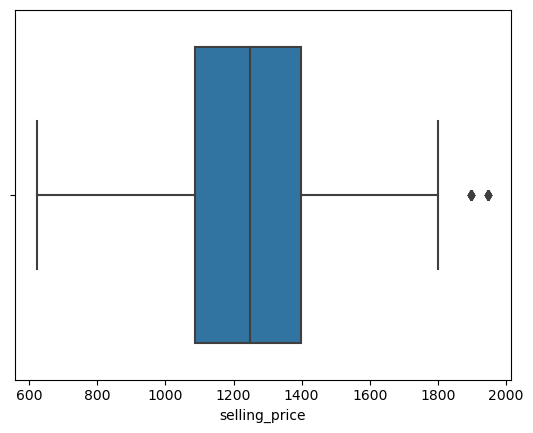

In [1100]:
sns.boxplot(pd_carData['engine'])
plt.xlabel('selling_price')

mileage

Text(0.5, 0, 'selling_price')

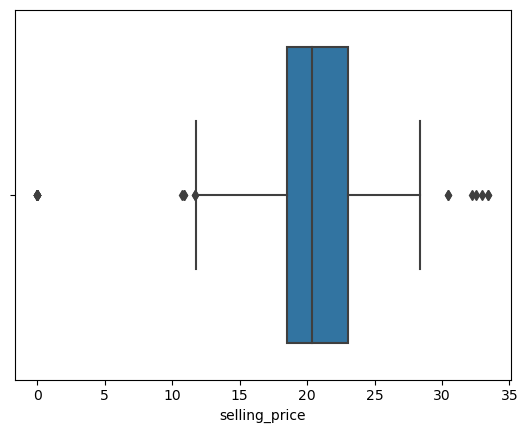

In [1101]:
sns.boxplot(pd_carData['mileage'])
plt.xlabel('selling_price')

truncado de mileage

In [1102]:
Q1 = pd_carData['mileage'].quantile(0.25)
Q3 = pd_carData['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

pd_carData[pd_carData['mileage']> upper_limit]
pd_carData[pd_carData['mileage']< lower_limit]

pd_carData = pd_carData[pd_carData['mileage'] < upper_limit]
pd_carData.shape

(5528, 13)

Text(0.5, 0, 'selling_price')

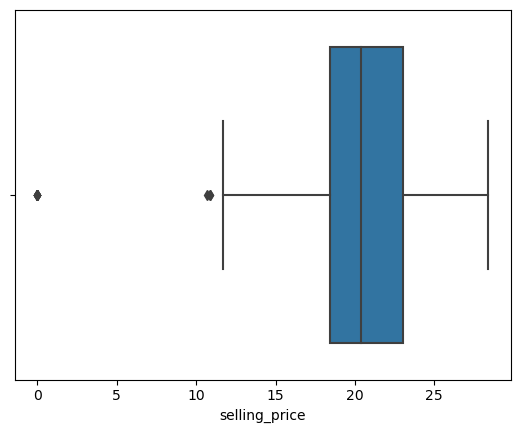

In [1103]:
sns.boxplot(pd_carData['mileage'])
plt.xlabel('selling_price')

max_power

Text(0.5, 0, 'selling_price')

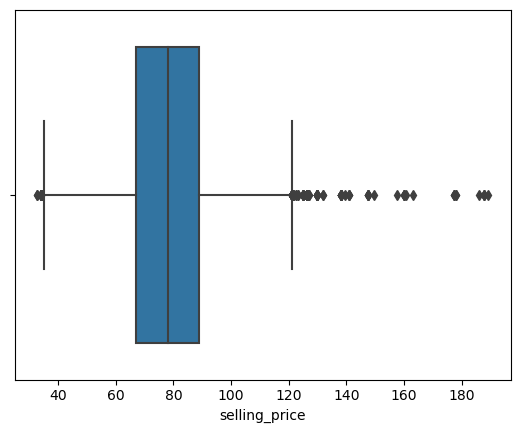

In [1104]:
sns.boxplot(pd_carData['max_power'])
plt.xlabel('selling_price')

truncado de max_power

In [1105]:
Q1 = pd_carData['max_power'].quantile(0.25)
Q3 = pd_carData['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

pd_carData[pd_carData['max_power']> upper_limit]
pd_carData[pd_carData['max_power']< lower_limit]

pd_carData = pd_carData[pd_carData['max_power'] < upper_limit]
pd_carData.shape

(5275, 13)

Text(0.5, 0, 'selling_price')

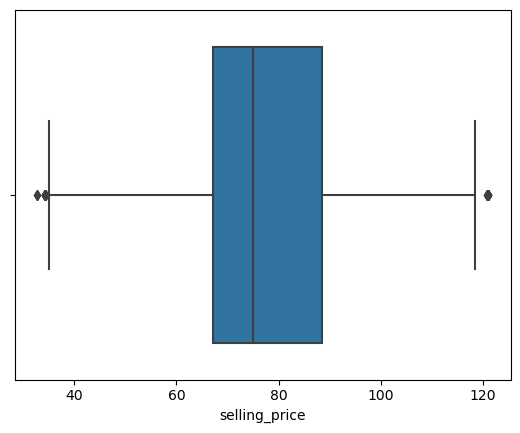

In [1106]:
sns.boxplot(pd_carData['max_power'])
plt.xlabel('selling_price')

km_driven

Text(0.5, 0, 'selling_price')

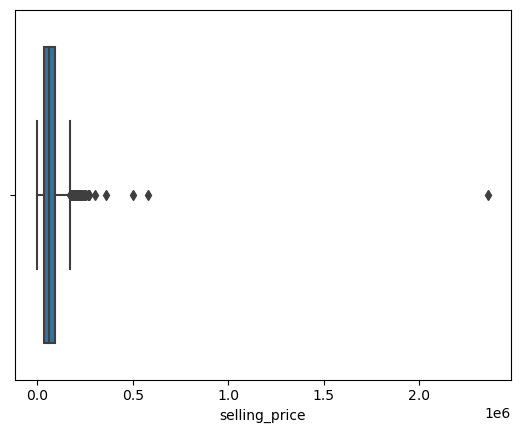

In [1107]:
sns.boxplot(pd_carData['km_driven'])
plt.xlabel('selling_price')

truncado km_driven

In [1108]:
Q1 = pd_carData['km_driven'].quantile(0.25)
Q3 = pd_carData['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

pd_carData[pd_carData['km_driven']> upper_limit]
pd_carData[pd_carData['km_driven']< lower_limit]

pd_carData = pd_carData[pd_carData['km_driven'] < upper_limit]
pd_carData.shape

(5155, 13)

Text(0.5, 0, 'selling_price')

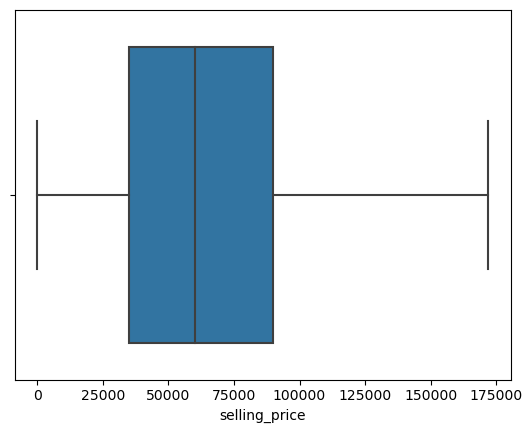

In [1109]:
sns.boxplot(pd_carData['km_driven'])
plt.xlabel('selling_price')

Variable objetivo - Selling_price

Text(0.5, 0, 'Selling_Price')

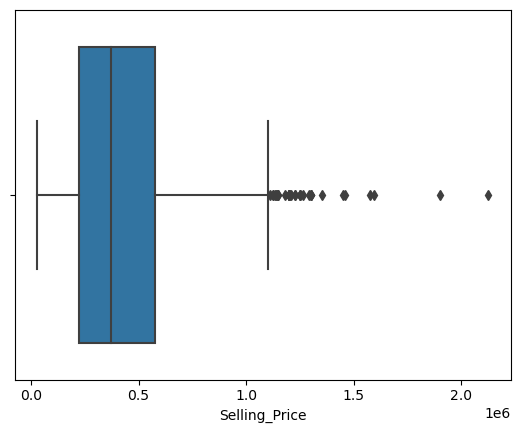

In [1110]:
sns.boxplot(pd_carData['selling_price'])
plt.xlabel('Selling_Price')

truncamos selling price

In [1111]:
Q1 = pd_carData['selling_price'].quantile(0.25)
Q3 = pd_carData['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

pd_carData[pd_carData['selling_price']> upper_limit]
pd_carData[pd_carData['selling_price']< lower_limit]

pd_carData = pd_carData[pd_carData['selling_price'] < upper_limit]
pd_carData.shape

(5116, 13)

Text(0.5, 0, 'Selling_Price')

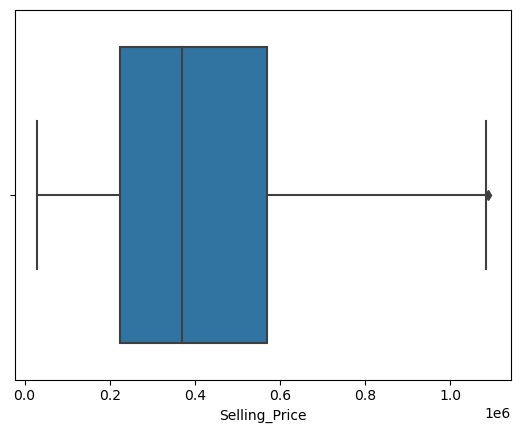

In [1112]:
sns.boxplot(pd_carData['selling_price'])
plt.xlabel('Selling_Price')

year

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2da82d730>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2da82dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2da82d460>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2da83b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2da83b580>],
 'means': []}

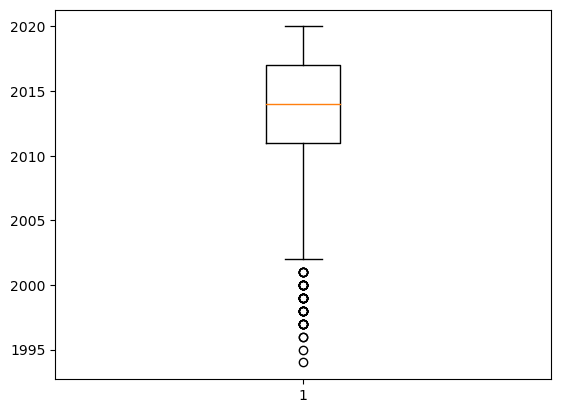

In [1113]:
plt.boxplot(pd_carData['year'],autorange=True)

(array([  1.,   1.,   0.,   2.,   8.,   0.,   9.,  11.,   0.,  11.,   6.,
          0.,  17.,  28.,   0.,  38.,  54.,   0.,  71.,   0., 124., 141.,
          0., 171., 274.,   0., 367., 417.,   0., 396., 414.,   0., 525.,
        551.,   0., 661., 498.,   0., 271.,  49.]),
 array([1994.  , 1994.65, 1995.3 , 1995.95, 1996.6 , 1997.25, 1997.9 ,
        1998.55, 1999.2 , 1999.85, 2000.5 , 2001.15, 2001.8 , 2002.45,
        2003.1 , 2003.75, 2004.4 , 2005.05, 2005.7 , 2006.35, 2007.  ,
        2007.65, 2008.3 , 2008.95, 2009.6 , 2010.25, 2010.9 , 2011.55,
        2012.2 , 2012.85, 2013.5 , 2014.15, 2014.8 , 2015.45, 2016.1 ,
        2016.75, 2017.4 , 2018.05, 2018.7 , 2019.35, 2020.  ]),
 <BarContainer object of 40 artists>)

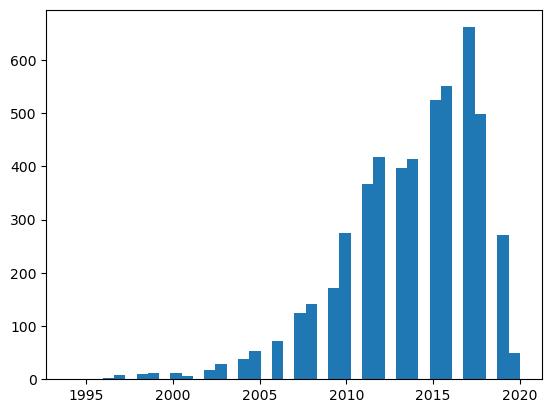

In [1114]:
plt.hist(pd_carData['year'],bins=40)

fuel , seller_type, transmission, owner

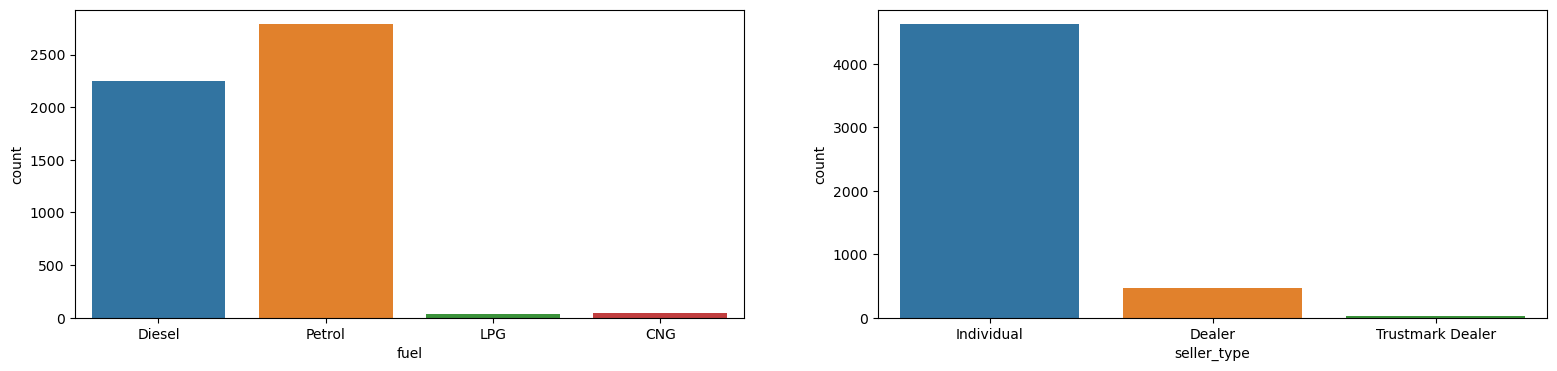

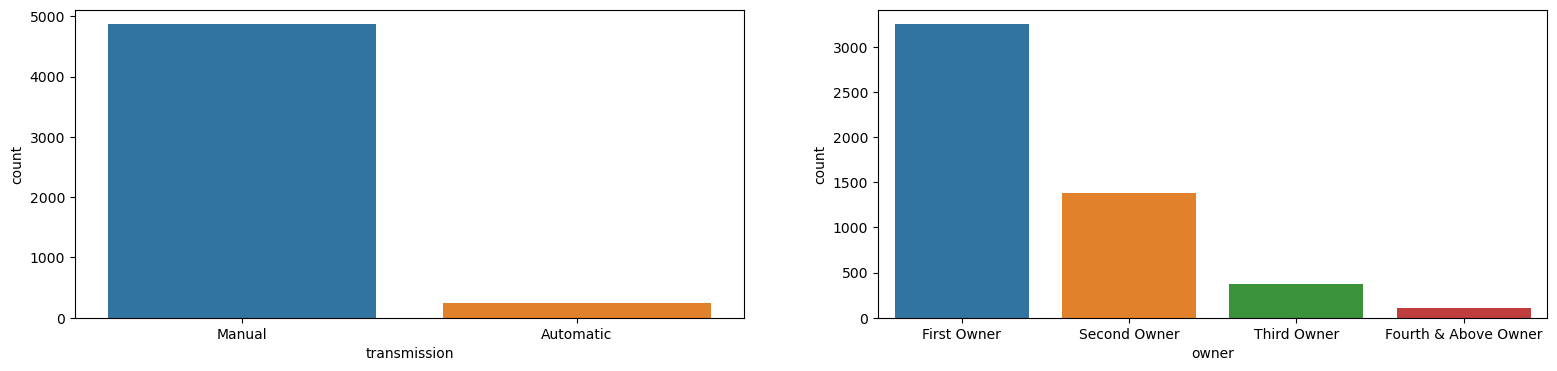

In [1115]:
cat_cols = ['fuel','seller_type','transmission','owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[19,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=pd_carData)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=pd_carData)
    i += 1
    
    
    plt.show()

seller_type

In [1116]:
var_dummies_ST = pd.get_dummies(pd_carData['seller_type'])
pd_carData = pd_carData.drop(columns=['seller_type'])

pd_carData[var_dummies_ST.columns]=var_dummies_ST

var_dummies_ST.columns

Index(['Dealer', 'Individual', 'Trustmark Dealer'], dtype='object')

fuel

In [1117]:
var_dummies_F = pd.get_dummies(pd_carData['fuel'])
pd_carData = pd_carData.drop(columns=['fuel'])

pd_carData[var_dummies_F.columns]=var_dummies_F

var_dummies_F.columns

Index(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='object')

transmission

In [1118]:
var_dummies_T = pd.get_dummies(pd_carData['transmission'])
pd_carData = pd_carData.drop(columns=['transmission'])

pd_carData[var_dummies_T.columns]=var_dummies_T

var_dummies_T.columns

Index(['Automatic', 'Manual'], dtype='object')

owner

In [1119]:
var_dummies_O = pd.get_dummies(pd_carData['owner'])
pd_carData = pd_carData.drop(columns=['owner'])

pd_carData[var_dummies_O.columns]=var_dummies_O

var_dummies_O.columns

Index(['First Owner', 'Fourth & Above Owner', 'Second Owner', 'Third Owner'], dtype='object')

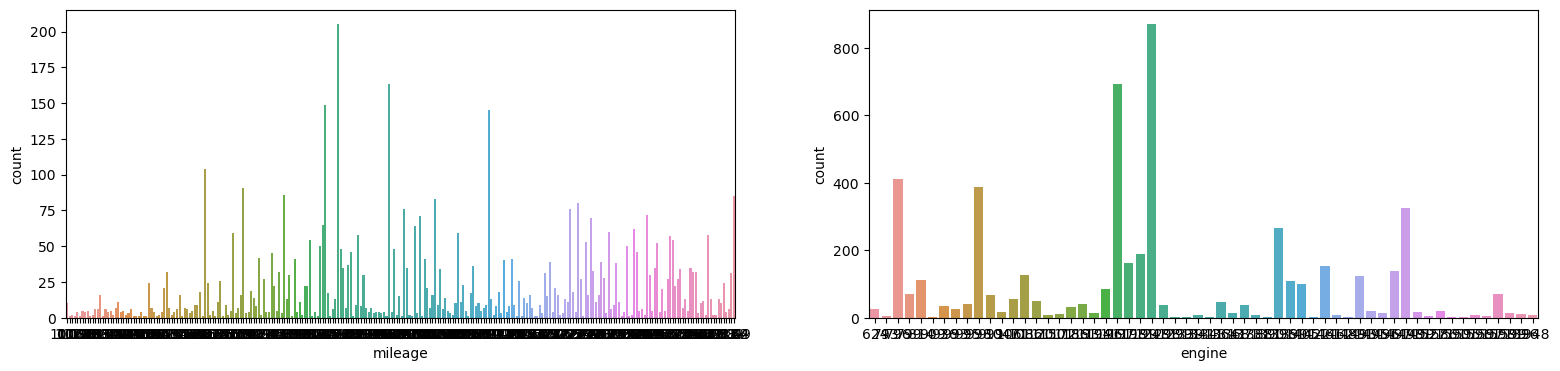

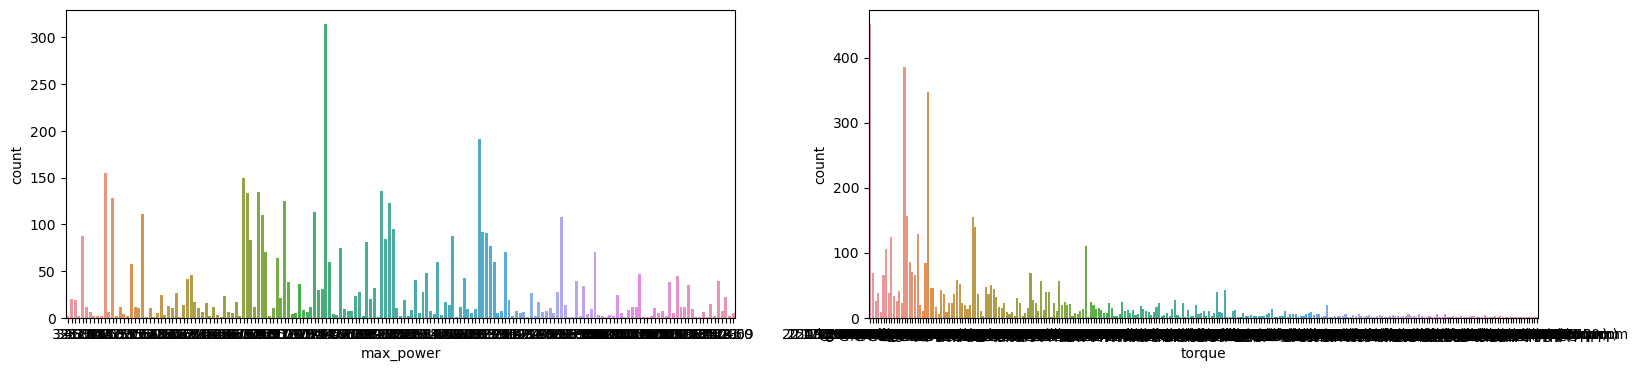

In [1120]:
cat_cols = ['mileage','engine','max_power','torque']
i=0
while i < 4:
    fig = plt.figure(figsize=[19,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=pd_carData)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=pd_carData)
    i += 1
    
    
    plt.show()

<h1>Feature Selection</h1>

<h3>Escalado/Normalizacion con mixmax, Feature Scaling</h3>

In [1121]:
y = pd_carData['selling_price']
x = pd.DataFrame(pd_carData.drop(columns=['selling_price','name','torque'],axis=1))
x.isnull()


,year,km_driven,mileage,engine,max_power,seats,Dealer,Individual,Trustmark Dealer,CNG,Diesel,LPG,Petrol,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Third Owner
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8123,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1122]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5116.0,2013.717944,3.959225,1994.0,2011.00,2014.0,2017.0,2020.0
km_driven,5116.0,64319.381939,36666.630555,1.0,35000.00,60000.0,90000.0,172000.0
mileage,5116.0,20.655735,3.400085,0.0,18.50,20.4,23.0,28.4
engine,5116.0,1210.277756,221.703578,624.0,1086.00,1199.0,1396.0,1948.0
max_power,5116.0,76.847296,17.199237,32.8,67.05,75.0,88.5,121.0
seats,5116.0,5.134285,0.600219,4.0,5.00,5.0,5.0,14.0
Dealer,5116.0,0.090696,0.287204,0.0,0.00,0.0,0.0,1.0
Individual,5116.0,0.904808,0.293508,0.0,1.00,1.0,1.0,1.0
Trustmark Dealer,5116.0,0.004496,0.066906,0.0,0.00,0.0,0.0,1.0
CNG,5116.0,0.008405,0.091302,0.0,0.00,0.0,0.0,1.0


In [1123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_MinMax = scaler.fit_transform(x)

<h3>Feature selection </h3>
<b>Metodos de Contraccion</b>
<p> - Regresion de Lasso</p>

In [1124]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(x_MinMax, y, test_size=0.3, random_state=42)

clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_MinMax,y)

print(clf.coef_)

[ 6.49498454e+05 -1.54608961e+05  8.41172984e+04 -1.40433993e+05
  5.11428800e+05  2.12500921e+05  1.93383398e+04 -5.69946237e+03
  8.21611833e+04 -4.28722556e+03  1.05426855e+05  4.59903511e+04
 -2.10958633e+03  6.28468738e+04 -8.33392311e-09  3.57602371e+04
  1.69503190e+04 -3.02929103e+03  1.52208102e+03]


In [1125]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6502, 16)
x test:  (1626, 16)
y train:  (6502,)
y test:  (1626,)


In [1126]:
df_coef = pd.DataFrame(clf.coef_)
df_columns = pd.DataFrame(x_scaled.columns)
df_lasso = pd.concat([df_columns,df_coef],axis=1)
df_lasso.columns = ['Specs','Lasso Coef']
df_lasso['Lasso Coef'] = np.abs(df_lasso['Lasso Coef'])
print(df_lasso.sort_values(by='Lasso Coef',axis=0,ascending=False))
df_lasso = df_lasso.sort_values(by='Lasso Coef',axis=0,ascending=False)

                   Specs    Lasso Coef
0                   year  6.494985e+05
4              max_power  5.114288e+05
5                  seats  2.125009e+05
1              km_driven  1.546090e+05
3                 engine  1.404340e+05
10                Diesel  1.054269e+05
2                mileage  8.411730e+04
8       Trustmark Dealer  8.216118e+04
13             Automatic  6.284687e+04
11                   LPG  4.599035e+04
15           First Owner  3.576024e+04
6                 Dealer  1.933834e+04
16  Fourth & Above Owner  1.695032e+04
7             Individual  5.699462e+03
9                    CNG  4.287226e+03
17          Second Owner  3.029291e+03
12                Petrol  2.109586e+03
18           Third Owner  1.522081e+03
14                Manual  8.333923e-09


In [1127]:
x_filtrado =x_scaled

x_filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5116.0,0.758382,0.152278,0.0,0.653846,0.769231,0.884615,1.0
km_driven,5116.0,0.373946,0.213179,0.0,0.203484,0.348833,0.523253,1.0
mileage,5116.0,0.727315,0.119721,0.0,0.651408,0.718310,0.809859,1.0
engine,5116.0,0.442808,0.167450,0.0,0.348943,0.434290,0.583082,1.0
max_power,5116.0,0.499402,0.195003,0.0,0.388322,0.478458,0.631519,1.0
seats,5116.0,0.113428,0.060022,0.0,0.100000,0.100000,0.100000,1.0
Dealer,5116.0,0.090696,0.287204,0.0,0.000000,0.000000,0.000000,1.0
Individual,5116.0,0.904808,0.293508,0.0,1.000000,1.000000,1.000000,1.0
Trustmark Dealer,5116.0,0.004496,0.066906,0.0,0.000000,0.000000,0.000000,1.0
CNG,5116.0,0.008405,0.091302,0.0,0.000000,0.000000,0.000000,1.0


In [1128]:
import statsmodels.api as sm
import seaborn as sns
import  pylab

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(x_filtrado, y, test_size=0.3, random_state=42)


model = sm.OLS(y_train_def.values.reshape(-1,1), sm.add_constant (X_train_def))
results=model.fit()

In [1129]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     658.9
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:05:21   Log-Likelihood:                -46802.
No. Observations:                3581   AIC:                         9.364e+04
Df Residuals:                    3565   BIC:                         9.373e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.099e+05 

In [1130]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

In [1131]:
regressor = RandomForestRegressor( random_state=42).fit(X_train, y_train)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.93947339850315
0.7335710852761046


In [1132]:
y_pred=regressor.predict(X_test)
train_pred=regressor.predict(X_train)

from sklearn.metrics import mean_absolute_error

print('R-Squared:',metrics.r2_score(y_test, y_pred)) 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Squared: 0.7335710852761046
MAE: 171738.7299656919
MSE: 131049003861.18105
RMSE: 362006.91134449496
